## FLU SHOT LEARNING: PREDICT H1N1 AND SEASONAL FLU VACCINES

Please fill out:
* Student name: Julliet Iswana
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Asha Deen
* Blog post URL:


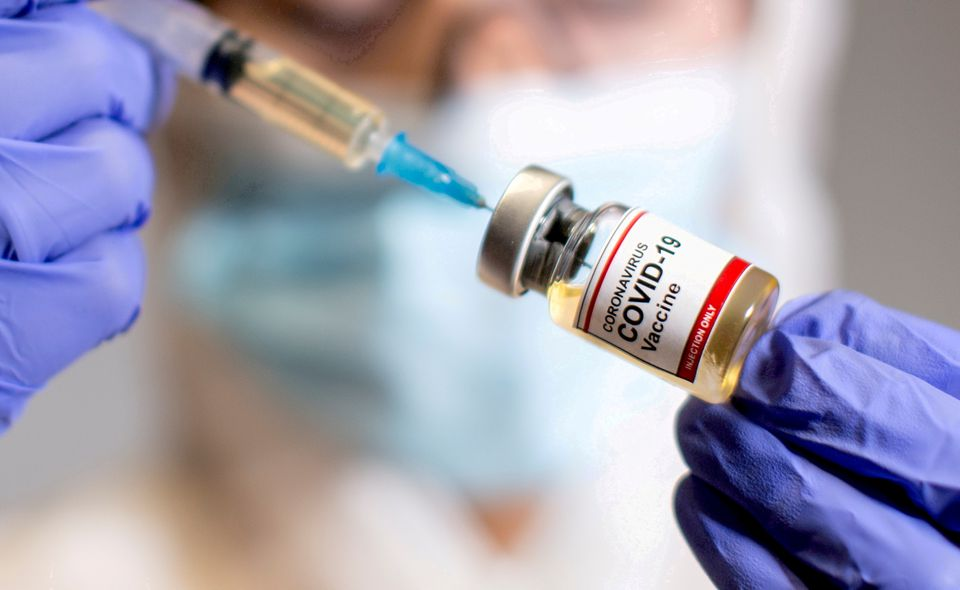

## Project Overview
In the early years of the 21st century, the health landscape has been significantly influenced by the rise of new viruses and global outbreaks. Roughly ten years apart, the World Health Organization (WHO) announced two major pandemics: influenza A H1N1 in 2009 and COVID-19 in 2020. Additionally, the world has seen outbreaks of non-respiratory viruses such as Zika, Chikungunya, and Ebola, which have garnered significant attention from global health authorities. Given these occurrences, it's evident that viruses will increasingly shape the realm of infectious diseases in the coming decades.
The year 2020 was unexpectedly dominated by the COVID-19 pandemic, which first appeared in Wuhan, China, towards the end of 2019. This pandemic is attributed to a new coronavirus, SARS-CoV-2, known to cause severe acute respiratory syndrome (SARS), hence its classification within the SARS taxonomy. Notably, there had been prior alerts about coronaviruses being potential pandemic triggers. This was evidenced by the SARS-CoV outbreak in 2002-2003 and the Middle East Respiratory Syndrome (MERS) in 2012 .

To sum up, the two prominent pandemics of this century were caused by distinct viruses, yet shared similarities, such as being enveloped RNA viruses with typically spherical shapes. Another noteworthy observation is the frequent mutations of these viruses and the wide range of hosts they can infect. Recognizing the significance of understanding the epidemiology of these pandemics and grasping the interplay between individuals' backgrounds, beliefs, and health habits in relation to their vaccination decisions offers valuable insights for shaping future public health strategies concerning pandemics.

When we understand the intricate relationships and patterns within data, especially from the perspective of data classification and analysis, it offers valuable insights for several reasons:

**Historical Context:** By analyzing data from previous pandemics, we can identify patterns and trends that have emerged over time. This can provide a historical context to understand how and why certain populations reacted to vaccination campaigns in specific ways.

**Predictive Value:** Insights derived from past data can be used to predict future behaviors. For instance, if certain demographic groups consistently showed hesitancy towards vaccinations during past pandemics, targeted awareness campaigns can be developed for these groups in the future.

**Tailored Interventions:** Understanding personal vaccination patterns in relation to backgrounds and opinions allows for the creation of tailored public health interventions. If certain cultural or socio-economic groups have specific concerns or misconceptions about vaccines, interventions can be designed to address those specific issues.

**Resource Allocation:** Insights from data classification can guide where resources (like awareness campaigns, vaccination centers, or community health workers) might be most effectively deployed.

**Behavioral Insights:** By understanding health behaviors and opinions, public health officials can better comprehend the underlying reasons for vaccine acceptance or hesitancy. This can inform the design of more effective communication strategies.

**Refinement of Strategies:** Analysis of past data can help in refining strategies for future pandemics. By understanding what worked and what didn't, strategies can be adjusted for greater effectiveness in the future.

**Stakeholder Engagement:** By demonstrating an understanding of the concerns and behaviors of different groups, public health officials can build trust and engage more effectively with communities.

## Research Questions:
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? This is a binary classification problem, but there are two potential targets: whether the survey respondent received the seasonal flu vaccine, or whether the respondent received the H1N1 flu vaccine. Please choose just one of these potential targets for your minimum viable project.


 **DATA SOURCE:** DrivenData. (2020). Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines. Retrieved [10 /17/2023] from https://www.drivendata.org/competitions/66/flu-shot-learning.

**IMPORT LIBRARIES FOR PROJECT

In [1]:
#common libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the training set features and labels
train_features = pd.read_csv('training_set_features.csv')
train_labels = pd.read_csv('training_set_labels.csv')

# Display the first few rows of the training set features and labels
train_features_head = train_features.head()
train_labels_head = train_labels.head()

train_features_head, train_labels_head


(   respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
 0              0           1.0             0.0                        0.0   
 1              1           3.0             2.0                        0.0   
 2              2           1.0             1.0                        0.0   
 3              3           1.0             1.0                        0.0   
 4              4           2.0             1.0                        0.0   
 
    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
 0                   0.0                   0.0                    0.0   
 1                   1.0                   0.0                    1.0   
 2                   1.0                   0.0                    0.0   
 3                   1.0                   0.0                    1.0   
 4                   1.0                   0.0                    1.0   
 
    behavioral_large_gatherings  behavioral_outside_home  \
 0                          0.

**training_set_features**  

contains information about the respondents, such as their level of concern about the H1N1 virus, knowledge about H1N1, behavioral habits, and demographic details. 

**training_set_labels**

provides the target variables for each respondent, indicating whether they received the H1N1 vaccine (h1n1_vaccine) and the seasonal vaccine (seasonal_vaccine).

**DATA ANALYSIS**

In [3]:
train_features.shape


(26707, 36)

In [4]:
train_labels.shape

(26707, 3)

In [5]:
# Merge the two data sets
merged_data = train_features.merge(train_labels, on="respondent_id")

In [6]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [7]:
merged_data.duplicated().sum()

0

In [8]:
merged_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [9]:
# Check for missing values in the training set features
missing_values = merged_data.isnull().sum()
missing_percentage = (missing_values / len(merged_data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

missing_data

,Missing Values,Percentage
employment_occupation,13470,50.436215
employment_industry,13330,49.912008
health_insurance,12274,45.957989
income_poverty,4423,16.561201
doctor_recc_h1n1,2160,8.087767
doctor_recc_seasonal,2160,8.087767
rent_or_own,2042,7.645936
employment_status,1463,5.477965
marital_status,1408,5.272026
education,1407,5.268282


 Several columns have missing values. The columns employment_occupation, employment_industry, and health_insurance have notably high percentages of missing data, with 50.44%, 49.91%, and 45.96% missing respectively. To handle the missing data, we have a few options:

For categorical data:
Fill missing values with the mode (most frequent value) of the column.
Create a new category, e.g., "Unknown" or "Not Provided".
For numerical data:
Fill with mean, median, or a designated placeholder value.
Use a model like KNN to impute the missing values.

**Visualising categorical data**

In [10]:
merged_data.h1n1_concern.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_concern, dtype: int64

In [11]:
merged_data.h1n1_knowledge.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_knowledge, dtype: int64

In [12]:
merged_data.behavioral_antiviral_meds.value_counts()

0.0    25335
1.0     1301
Name: behavioral_antiviral_meds, dtype: int64

In [13]:
merged_data.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [14]:
merged_data.opinion_h1n1_risk.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: opinion_h1n1_risk, dtype: int64

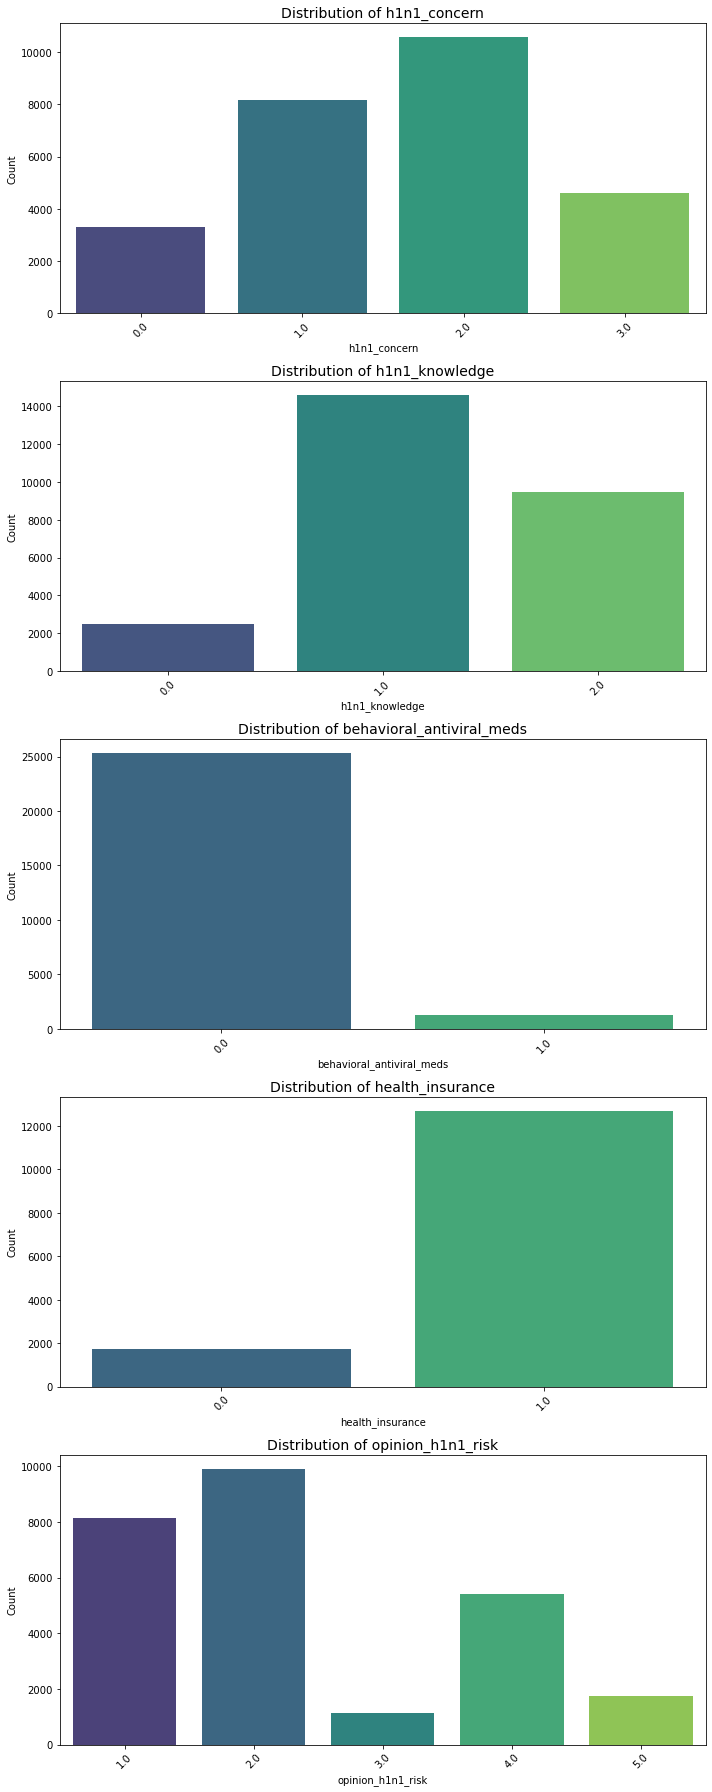

In [15]:
# list of features to plot
features_to_plot = ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'health_insurance', 'opinion_h1n1_risk']

# Plotting the distribution for each feature using catplot
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(10, 25))

for i, col in enumerate(features_to_plot):
    sns.countplot(data=merged_data, x=col, ax=axes[i], palette="viridis")
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


the plot displays the distribution of the h1n1_concern feature:

Level 0: Represents respondents with no concern about H1N1.

Level 1: Represents respondents with a low level of concern.

Level 2: Represents respondents with a moderate level of concern.

Level 3: Represents respondents with a high level of concern.

 we can observe:

The majority of respondents have a moderate level of concern (Level 2) about H1N1.
The number of respondents with a high level of concern (Level 3) is slightly lower than those with a moderate level.
Fewer respondents have low concern or no concern about H1N1 (Levels 0 and 1).

H1N1 Knowledge:

The majority of respondents have a moderate level of knowledge about H1N1 (Level 2).
A significant number have a high level of knowledge (Level 1).
Few respondents have no knowledge about H1N1 (Level 0).
Behavioral Antiviral Meds:

Most respondents did not take antiviral medications.
Only a small proportion took antiviral medications.
Health Insurance:

A significant number of respondents have health insurance.
However, there's also a considerable number of respondents without health insurance.
Opinion on H1N1 Risk:

Many respondents believe they have a moderate risk of getting sick with H1N1 if they don't get vaccinated.
Fewer respondents believe they have a high risk, while some believe they have a low risk or are not sure.

**Bivariate analysis for h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'health_insurance', 'opinion_h1n1_risk'**

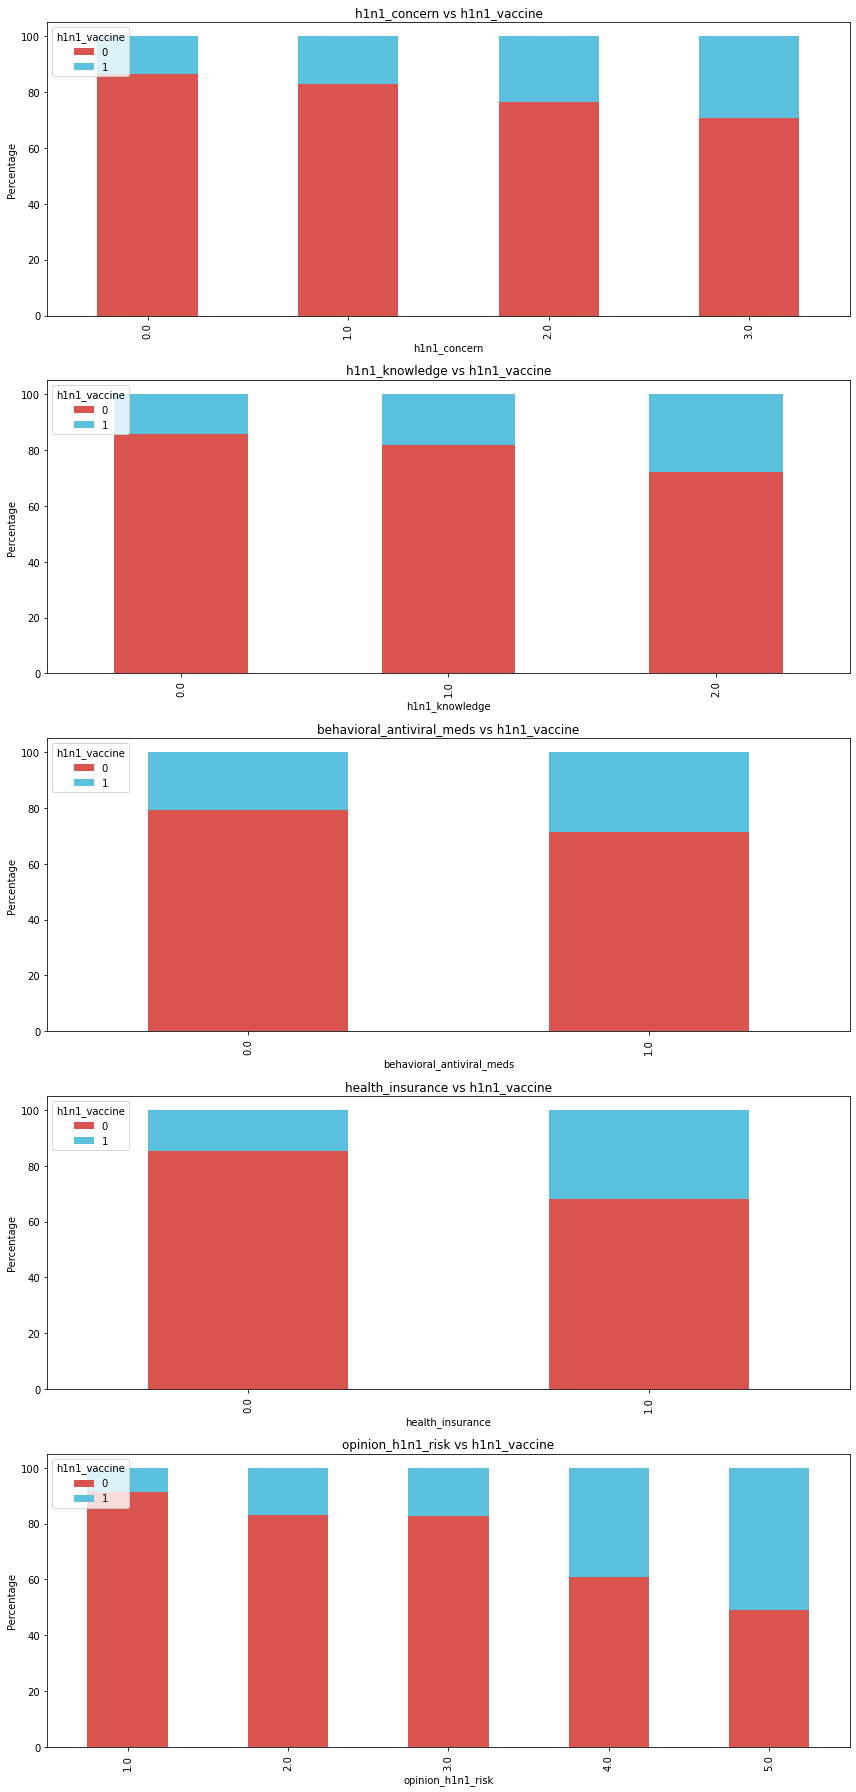

In [16]:
# Function to plot stacked bar charts for bivariate analysis
def plot_stacked_bar(feature, target, df, ax):
    """Plot a stacked bar chart for a categorical feature against a binary target."""
    # Create a crosstab of the feature against the target
    ctab = pd.crosstab(df[feature], df[target], normalize='index') * 100
    ctab.plot(kind='bar', stacked=True, ax=ax, color=['#d9534f', '#5bc0de'])
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Percentage')
    ax.set_xlabel(feature)
    ax.legend(title=target, loc='upper left')

# Features to analyze


# Plotting bivariate analysis for h1n1_vaccine
fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(12, 25))

for i, feature in enumerate(features_to_plot):
    plot_stacked_bar(feature, 'h1n1_vaccine', merged_data, axes[i])

plt.tight_layout()
plt.show()

**Bivariate analysis for Age Group, Education, Income Poverty, Race and Sex**

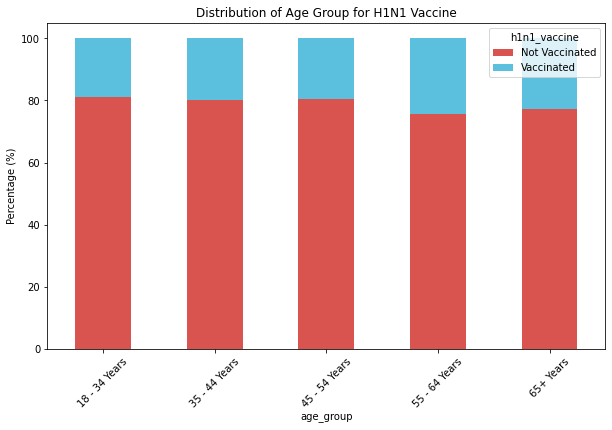

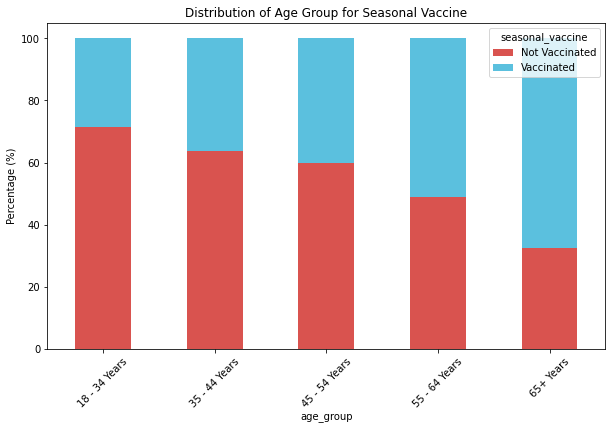

In [17]:
# Function to plot stacked bar chart for demographic feature vs vaccine
def plot_stacked_bar(feature, vaccine, title):
    # Create crosstab for the feature and vaccine
    ct = pd.crosstab(merged_data[feature], merged_data[vaccine], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, color=['#d9534f', '#5bc0de'], figsize=(10, 6))
    plt.title(title)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend(title=vaccine, labels=['Not Vaccinated', 'Vaccinated'])
    plt.show()

# Plot for age_group vs h1n1_vaccine
plot_stacked_bar('age_group', 'h1n1_vaccine', 'Distribution of Age Group for H1N1 Vaccine')

# Plot for age_group vs seasonal_vaccine
plot_stacked_bar('age_group', 'seasonal_vaccine', 'Distribution of Age Group for Seasonal Vaccine')


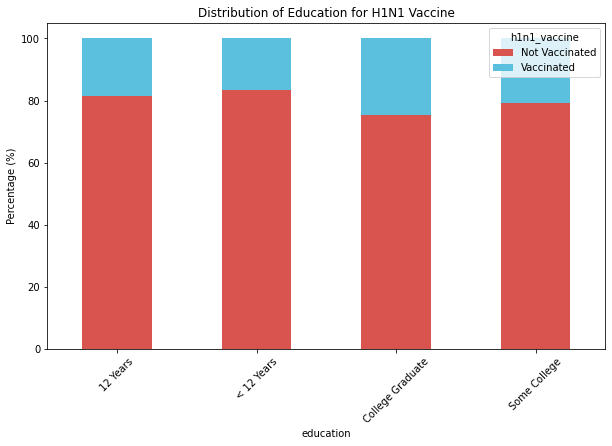

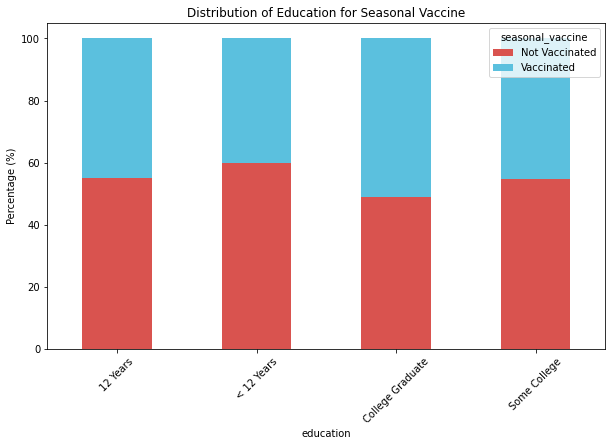

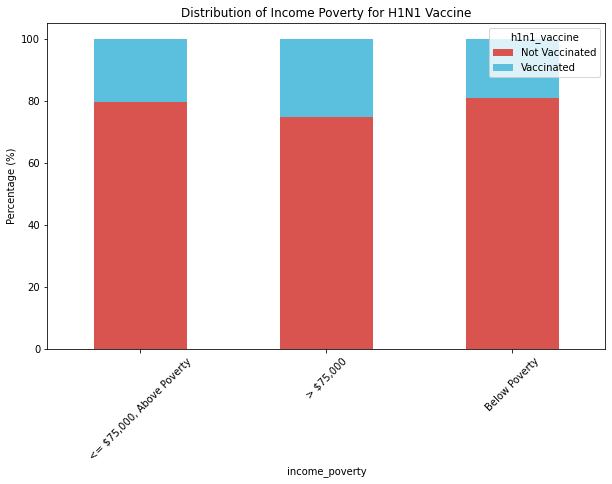

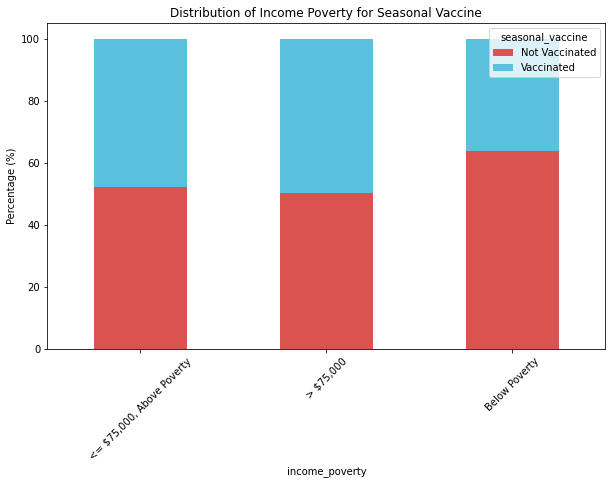

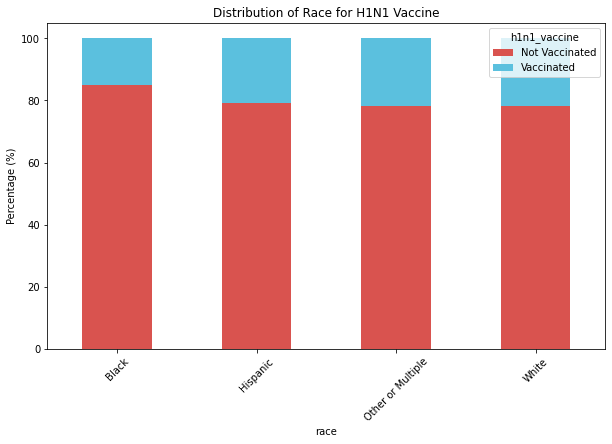

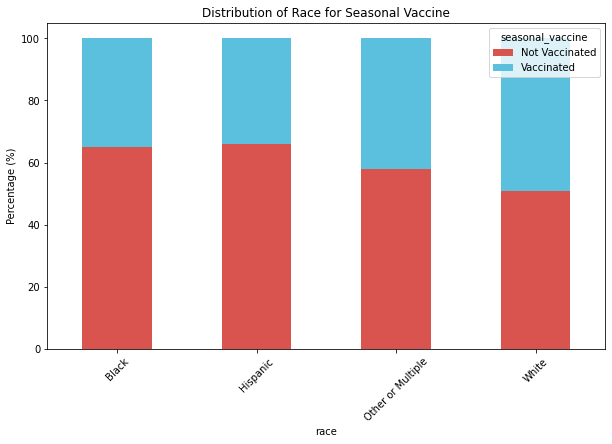

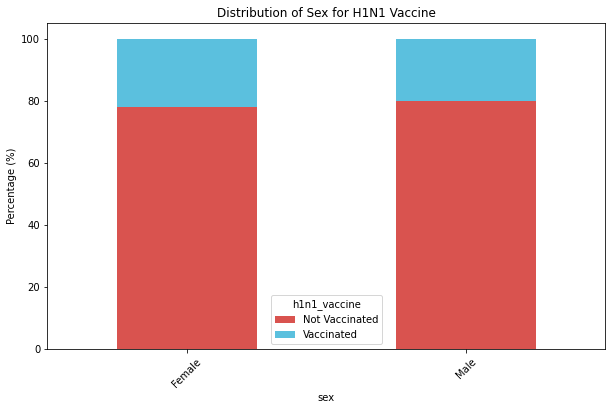

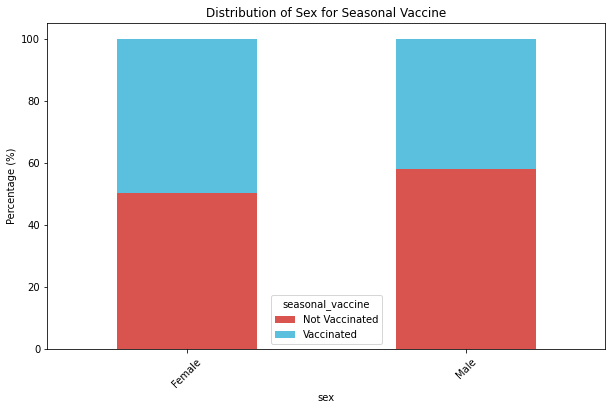

In [18]:
# Plotting the distribution for other demographic features

# For education vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('education', 'h1n1_vaccine', 'Distribution of Education for H1N1 Vaccine')
plot_stacked_bar('education', 'seasonal_vaccine', 'Distribution of Education for Seasonal Vaccine')

# For income_poverty vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('income_poverty', 'h1n1_vaccine', 'Distribution of Income Poverty for H1N1 Vaccine')
plot_stacked_bar('income_poverty', 'seasonal_vaccine', 'Distribution of Income Poverty for Seasonal Vaccine')

# For race vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('race', 'h1n1_vaccine', 'Distribution of Race for H1N1 Vaccine')
plot_stacked_bar('race', 'seasonal_vaccine', 'Distribution of Race for Seasonal Vaccine')

# For sex vs h1n1_vaccine and seasonal_vaccine
plot_stacked_bar('sex', 'h1n1_vaccine', 'Distribution of Sex for H1N1 Vaccine')
plot_stacked_bar('sex', 'seasonal_vaccine', 'Distribution of Sex for Seasonal Vaccine')


The stacked bar charts illustrate the distribution of vaccinations based on various demographic features:

Education:
For both the H1N1 and seasonal vaccines, individuals with higher education levels (e.g., College Graduate) tend to have higher vaccination rates compared to those with lower education levels.

Income Poverty:
Individuals below the poverty line (Below Poverty) have a slightly lower vaccination rate for both vaccines, especially the seasonal vaccine, compared to those above the poverty line.

Race:
White individuals have a notably higher vaccination rate for both vaccines compared to other racial groups.
The seasonal vaccine's distribution further highlights this disparity, with the Black and Other or Multiple race groups having notably lower vaccination rates.

Sex:
Females have a slightly higher vaccination rate for both vaccines compared to males.

**CORRELATION ANALYSIS**


this will help us in understanding how the different features correlate with the decision to get the H1N1 vaccine and the seasonal flu vaccine. 



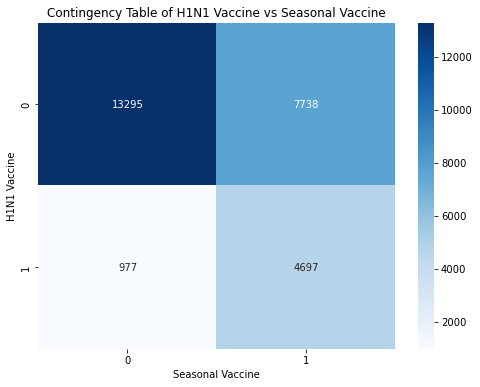

In [19]:
# Create a contingency table
contingency_table = pd.crosstab(merged_data['h1n1_vaccine'], merged_data['seasonal_vaccine'])

# Plot the contingency table as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Contingency Table of H1N1 Vaccine vs Seasonal Vaccine')
plt.xlabel('Seasonal Vaccine')
plt.ylabel('H1N1 Vaccine')
plt.show()



From the heatmap of the contingency table, we can observe the following:

A significant number of respondents didn't take either the H1N1 vaccine or the seasonal flu vaccine.
A large group took only the seasonal flu vaccine but not the H1N1 vaccine.
There's also a notable group that took both vaccines.

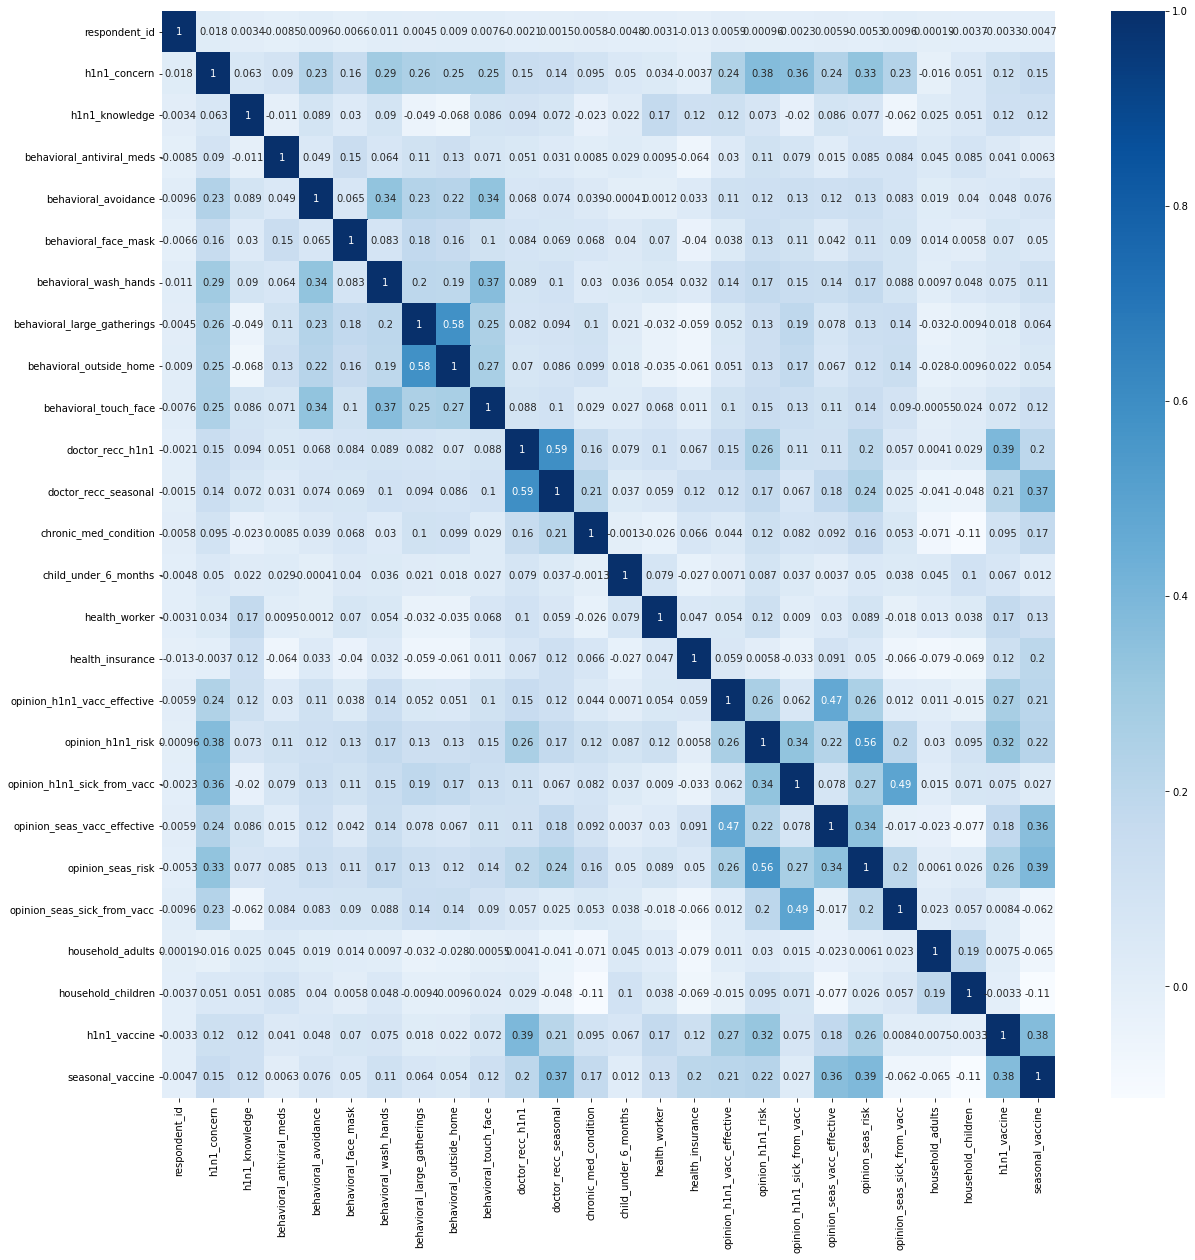

In [20]:
#get correlations of each features in dataset
corrmat = merged_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(merged_data[top_corr_features].corr(),annot=True,cmap="Blues")

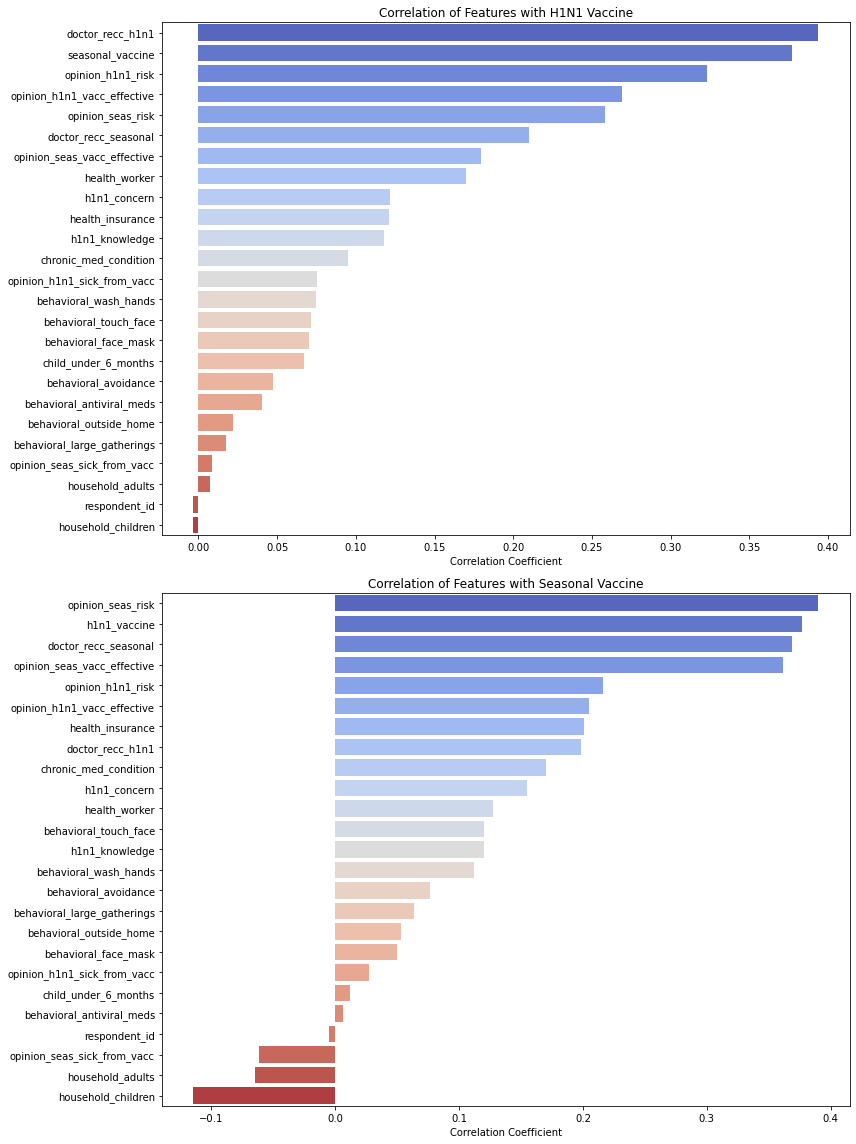

In [21]:
# Compute the correlation matrix
correlation_matrix = merged_data.corr()

# Extract correlations with the two target variables
h1n1_correlations = correlation_matrix["h1n1_vaccine"].sort_values(ascending=False)
seasonal_correlations = correlation_matrix["seasonal_vaccine"].sort_values(ascending=False)

# Plot correlations
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# H1N1 Vaccine Correlations
sns.barplot(x=h1n1_correlations[1:], y=h1n1_correlations.index[1:], ax=ax1, palette="coolwarm")
ax1.set_title("Correlation of Features with H1N1 Vaccine")
ax1.set_xlabel("Correlation Coefficient")

# Seasonal Vaccine Correlations
sns.barplot(x=seasonal_correlations[1:], y=seasonal_correlations.index[1:], ax=ax2, palette="coolwarm")
ax2.set_title("Correlation of Features with Seasonal Vaccine")
ax2.set_xlabel("Correlation Coefficient")

plt.tight_layout()
plt.show()


H1N1 Vaccine Correlations:

Doctor recommendations (doctor_recc_h1n1) have the highest positive correlation with getting the H1N1 vaccine. This suggests that individuals are more likely to get vaccinated if recommended by a healthcare professional.
Respondents' opinions on the risks and effectiveness of the H1N1 vaccine (opinion_h1n1_risk, opinion_h1n1_vacc_effective, and opinion_h1n1_sick_from_vacc) also show significant correlations.


Seasonal Vaccine Correlations:

The age group of the respondent (age_group) has a strong positive correlation with receiving the seasonal vaccine.
Doctor recommendations for the seasonal flu vaccine (doctor_recc_seasonal) and opinions about its risk and effectiveness are also significantly correlated.
Interestingly, the correlation of h1n1_vaccine with the seasonal vaccine is also evident, reinforcing our earlier observation that the two are not independent.

**CHECKING CLASS IMBALANCE**

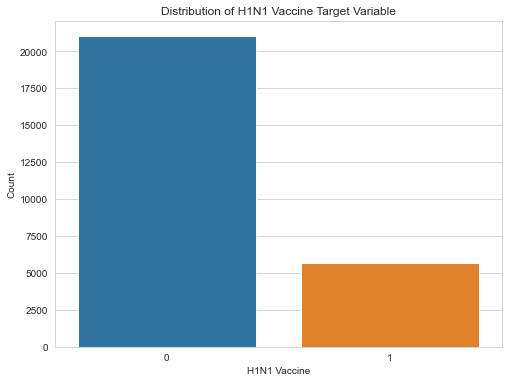

In [22]:
# Setting for plots
sns.set_style("whitegrid")

# Plot distribution of the h1n1_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_data['h1n1_vaccine'])
plt.title('Distribution of H1N1 Vaccine Target Variable')
plt.xlabel('H1N1 Vaccine')
plt.ylabel('Count')
plt.show()




Distribution of `H1N1 Vaccine Target Variable` It appears that the majority of respondents in the training data did not receive the H1N1 vaccine. This indicates a class imbalance which we need to consider during modeling.

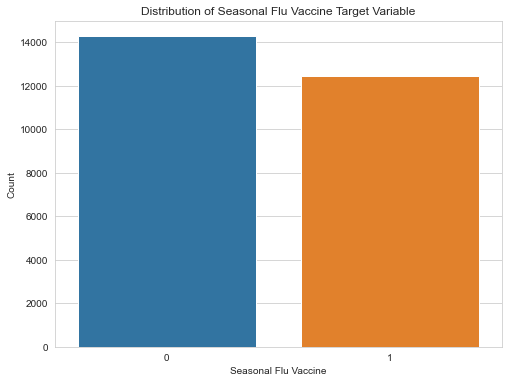

In [23]:
# Plot distribution of the seasonal_vaccine target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=merged_data['seasonal_vaccine'])
plt.title('Distribution of Seasonal Flu Vaccine Target Variable')
plt.xlabel('Seasonal Flu Vaccine')
plt.ylabel('Count')
plt.show()


The distribution of the `seasonal_vaccine` target variable shows that there's a more balanced split between those who received the seasonal flu vaccine and those who did not. Compared to the H1N1 vaccine distribution, a larger proportion of respondents in the training data received the seasonal flu vaccine.

This provides an interesting perspective: while many respondents chose to get vaccinated for the seasonal flu, fewer decided to get the H1N1 vaccine. This discrepancy might be due to various reasons, such as public perception, availability, or urgency.

